In [5]:
from gensim.models import FastText
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
ft = FastText(sentences, min_count=1, size=10)
from fse.models import Average
from fse import IndexedList
model = Average(ft)
model.train(IndexedList(sentences))
model.sv.similarity(0,1)

C:\Users\70473\Anaconda3\lib\site-packages\fse\models\base_s2v.py:114: UserWarning: C extension not loaded, training/inferring will be slow. Install a C compiler and reinstall fse.
  warnings.warn(


0.48041457

## word embedding and SIF model

In [6]:
from gensim.models import KeyedVectors
import pandas as pd
from fse.models import SIF
import gensim
from gensim.models import Word2Vec
import os
wemb_model = KeyedVectors.load_word2vec_format("data/crawl-300d-2M.vec")
# PATH_TO_WORD2VEC = os.path.expanduser("data/GoogleNews-vectors-negative300.bin")
# word2vec = gensim.models.KeyedVectors.load_word2vec_format(PATH_TO_WORD2VEC, binary=True)
model = SIF(wemb_model, components=2, lang_freq="en")

In [70]:
raw = pd.read_pickle("tsne.pkl")

## train sentence embedding

In [85]:
ls = ["Health Care","Real Estate","Agriculture and Farming","Sports","Education","Food and Beverage","Financial Services","Travel and Tourism"]

In [88]:
train_data = raw[raw["tsne_cat"].apply(lambda x:x in ls)]

In [75]:
raw["tsne_cat"].unique()

array(['Content and Publishing', 'Administrative Services',
       'Internet Services', 'Financial Services', 'Apps',
       'Commerce and Shopping', 'Community and Lifestyle', 'Hardware',
       'Data and Analytics', 'NaN', 'Advertising', 'Biotechnology',
       'Information Technology', 'Education', 'Clothing and Apparel',
       'Media and Entertainment', 'Artificial Intelligence', 'Other',
       'Food and Beverage', 'Gaming', 'Consumer Electronics', 'Energy',
       'Mobile', 'Transportation', 'Events', 'Privacy and Security',
       'Design', 'Real Estate', 'Health Care', 'Software',
       'Consumer Goods', 'Professional Services',
       'Messaging and Telecommunications', 'Platforms',
       'Travel and Tourism', 'Manufacturing', 'Sports',
       'Sales and Marketing', 'Agriculture and Farming',
       'Government and Military', 'Science and Engineering',
       'Sustainability', 'Navigation and Mapping', 'Payments',
       'Natural Resources'], dtype=object)

In [89]:
from fse import SplitIndexedList
indexed_descriptions = SplitIndexedList(train_data["description"].values)
model.train(indexed_descriptions)

(152498, 9717357)

## database

## Similarity computing

In [70]:
ls = []
for i in name_ls_travel.index:
    ls.append((i,model.sv.similarity(6887,i).round(3)))

In [74]:
sorted(ls, key=lambda x: x[1], reverse = True)

[(6887, 1.0),
 (129495, 0.561),
 (212182, 0.528),
 (634546, 0.525),
 (600840, 0.513),
 (145346, 0.502),
 (479554, 0.5),
 (112401, 0.495),
 (187092, 0.494),
 (327563, 0.49),
 (141840, 0.485),
 (186793, 0.48),
 (398041, 0.476),
 (32681, 0.473),
 (62132, 0.47),
 (304816, 0.47),
 (324878, 0.468),
 (562522, 0.464),
 (8216, 0.463),
 (55713, 0.463),
 (59422, 0.462),
 (108533, 0.461),
 (24686, 0.46),
 (153973, 0.46),
 (421638, 0.46),
 (639925, 0.459),
 (169282, 0.451),
 (109103, 0.45),
 (2228, 0.448),
 (55563, 0.448),
 (77258, 0.448),
 (225014, 0.445),
 (405392, 0.444),
 (92317, 0.443),
 (169947, 0.441),
 (393135, 0.44),
 (72014, 0.439),
 (228306, 0.435),
 (407989, 0.433),
 (26127, 0.432),
 (313826, 0.43),
 (16591, 0.429),
 (172723, 0.429),
 (296895, 0.429),
 (140437, 0.428),
 (89129, 0.427),
 (295416, 0.427),
 (304797, 0.422),
 (140994, 0.42),
 (278269, 0.42),
 (383222, 0.42),
 (50776, 0.419),
 (66781, 0.419),
 (515410, 0.419),
 (240385, 0.418),
 (210693, 0.417),
 (594780, 0.417),
 (23337, 0.

In [65]:
name_ls_travel = raw[raw.apply(lambda x: "Travel" in x["category_list"],axis = 1)]

In [ ]:
def first_return_searh_result(query_company,database,data,wem_model):
    set_a = data[data["name"] == query_company]["category_coding"].values[0]
    search_data = data[data["category_coding"].apply(lambda x:Search_coms(x,set_a))]
    collection = database[query_company]
    print("Please wait for generating all the competitors")
    for search_company in search_data["name"].values[:10]:
        pair = {}
        try:
            sim, com_des_one,com_des_two = return_similarity(data,query_company,search_company,wem_model,False,"cos")
#             print(query_company,search_company)
            cat_sim = return_cat_sim(data,query_company,search_company)
            size_diff = data[data["name"] == query_company]["status_coding"].values[0] - data[data["name"] == search_company]["status_coding"].values[0]
        except:
            pass
        pair["name_query"] = query_company
        pair["name_result"] = search_company
        pair["query_description"] = com_des_one
        pair["result_description"] = com_des_two
        pair["text_similarity"] = float(sim)
        pair["cat_similarity"] = float(cat_sim)
        pair["size_difference"] = int(size_diff)
        collection.insert_one(pair)
    print("************Data is prepared**************")

In [81]:
raw.iloc[212182]

uuid                                 bfaba247-96f2-27fb-70d1-9570adc4a662
name                                                      CanadaStays.com
rank                                                                45113
roles                                                             company
status                                                           acquired
short_description       CanadaStays.com is unchallenged as Canada's la...
category_list                                                      Travel
category_groups_list                                   Travel and Tourism
num_funding_rounds                                                      3
employee_count                                                      11-50
founded_on                                            2009-01-01 00:00:00
description             With over 50,000 vacation rentals, cottages, c...
p_uuid                                                                NaN
p_name                                

In [67]:
name_ls_travel.index

Int64Index([   140,    143,    147,    151,    172,    180,    239,    401,
               572,    642,
            ...
            660994, 661040, 661159, 661200, 661272, 661281, 661452, 661459,
            661540, 661553],
           dtype='int64', length=12392)

In [62]:
raw[raw["name"] == "Airbnb"]

,uuid,name,rank,roles,status,short_description,category_list,category_groups_list,num_funding_rounds,employee_count,...,d_name,ins_uuid,ins_name,degree_type,subject,category_coding,acquired,closed,ipo,operating


In [61]:
raw[raw["name"] == "SkipperMyBoat Inc."]

,uuid,name,rank,roles,status,short_description,category_list,category_groups_list,num_funding_rounds,employee_count,...,d_name,ins_uuid,ins_name,degree_type,subject,category_coding,acquired,closed,ipo,operating
168608,95690219-7568-ac69-4b4f-fe7ba7bc2fde,Zizoo,8874.0,company,operating,Zizoo is a leading boat holiday platform.,"Location Based Services,Rental,Sailing,Travel","Commerce and Shopping,Data and Analytics,Inter...",5.0,101-250,...,BA Politics @ University of Leeds,8a3d6c75-409c-e9cc-9338-0beb4c623156,University of Leeds,BA,Politics,"[402, 561, 582, 675]",0,0,0,1


In [12]:
model.sv.vectors

array([[ 0.03229642, -0.04103709, -0.02054809, ...,  0.0180604 ,
        -0.01485475, -0.02058364],
       [-0.0663918 , -0.00937275,  0.05753741, ...,  0.02132324,
        -0.09842912, -0.10414804],
       [ 0.00318454, -0.09107003,  0.00030517, ..., -0.02376798,
        -0.00177054, -0.01671386],
       ...,
       [-0.00579394, -0.01881241,  0.06804205, ..., -0.03745095,
         0.04977719,  0.05328203],
       [ 0.042354  , -0.0351254 , -0.03239372, ...,  0.02014931,
        -0.00059505,  0.01923689],
       [ 0.01532183, -0.05603386, -0.03022679, ...,  0.01023542,
        -0.00852027, -0.01901232]], dtype=float32)

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
x, y = iris["data"], iris["target"]

In [ ]:
from openTSNE import TSNE
import examples
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
x, y = iris["data"], iris["target"]

In [ ]:
tsne = TSNE(
    perplexity=40,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [91]:
%time embedding_train = tsne.fit(model.sv.vectors)

--------------------------------------------------------------------------------
TSNE(n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 62.03 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 3.19 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.77 seconds
===> Running optimization with exaggeration=12.00, lr=12708.17 for 250 iterations...
Iteration   50, KL divergence 7.9456, 50 iterations in 12.5796 sec
Iteration  100, KL divergence 7.5875, 50 iterations in 17.4383 sec
Iteration  150, KL divergence 7.5366, 50 iterations in 17.7034 sec
Iteration  200, KL divergence 7.5271, 50 iterations in 15.7020 sec
Iteration  250, KL divergence 7.5236, 50 iterations in 13.9790 sec
   --> Time elapsed: 77.41 seconds
===> Running optimization with exaggeration=1.00, lr=12708.1

In [48]:
import seaborn as sns

In [55]:
data = pd.read_pickle("tsne.pkl")

In [92]:
y = train_data["tsne_cat"].values

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [50]:
len(embedding_train)

150

C:\Users\70473\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


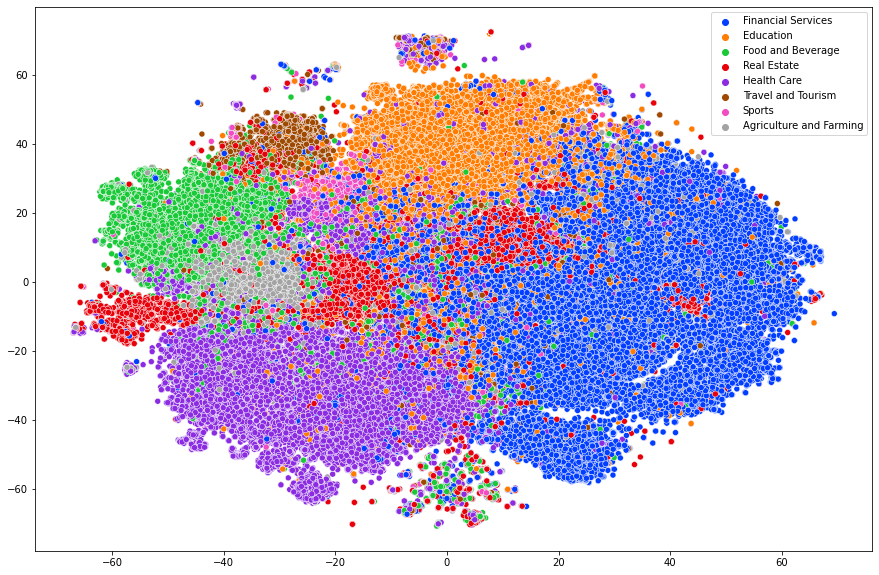

In [96]:
plt.figure(figsize=(15, 10))
palette = sns.color_palette("bright", 8)
fig = sns.scatterplot(embedding_train[:,0], embedding_train[:,1], hue=y, palette=palette)
scatter_fig = fig.get_figure()
scatter_fig.savefig("fig_final.jpg",dpi = 400)